<a href="https://colab.research.google.com/github/ranjitben10/Rag_examples/blob/main/Multi_agentsRAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
{
  "clientId": "oUskjsJdpFavOyaCaIhLUsNH",
  "secret": "ZjRXhZlDwdqCB0l2xhT2YgXwfHOWexp5N1EX1TBeHFQO8YZr6+EZ7KXNJAJqtdO..hDkbyZEAQN5Zv2v,_DmfXJL0QSNKN8YXG.L6pG0wfO8W4kP3ClgXZne9UAZSh2S",
  "token": "AstraCS:oUskjsJdpFavOyaCaIhLUsNH:f6bb054aa6db8f2097c9753807451c6225eb10c2475736900c269d0fa4c5e3aa"
}
7bd09b29-ecc9-4787-bead-c8bc1764d64a -id
"""

'\n{\n  "clientId": "oUskjsJdpFavOyaCaIhLUsNH",\n  "secret": "ZjRXhZlDwdqCB0l2xhT2YgXwfHOWexp5N1EX1TBeHFQO8YZr6+EZ7KXNJAJqtdO..hDkbyZEAQN5Zv2v,_DmfXJL0QSNKN8YXG.L6pG0wfO8W4kP3ClgXZne9UAZSh2S",\n  "token": "AstraCS:oUskjsJdpFavOyaCaIhLUsNH:f6bb054aa6db8f2097c9753807451c6225eb10c2475736900c269d0fa4c5e3aa"\n}\n'

In [1]:
!pip install langchain langgraph cassio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 88.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.9/399.9 kB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.2/290.2 kB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.0/378.0 kB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.4 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existi

In [2]:
import cassio


In [3]:
ASTRA_DB_APPLICATION_TOKEN = "AstraCS:oUskjsJdpFavOyaCaIhLUsNH:f6bb054aa6db8f2097c9753807451c6225eb10c2475736900c269d0fa4c5e3aa"
ASTRA_DB_ID = "7bd09b29-ecc9-4787-bead-c8bc1764d64a"


In [4]:
cassio.init(token=ASTRA_DB_APPLICATION_TOKEN,database_id=ASTRA_DB_ID)

In [5]:
!pip install langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 4.1 MB/s eta 0:00:00


In [6]:
!pip install -U langchain_community langchain langgraph tiktoken chromadb langchainhub langchain-groq langchain_huggingface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 4.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.2/599.2 kB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 81.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.8/273.8 kB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 69.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.9/88.9 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 90.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [7]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader

In [8]:
urls = [
    "https://www.health.harvard.edu/blog/which-skin-creams-are-most-effective-for-eczema-202310122981",
    "https://www.ign.com/articles/transformers-one-movie-proves-animation-is-the-way-forward-for-the-troubled-franchise",
    "https://docs.smith.langchain.com/"
]

docs = [WebBaseLoader(url).load() for url in urls]
doc_list = [item for sublist in docs for item in sublist]
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(chunk_size=500,chunk_overlap = 20)
texts = text_splitter.split_documents(doc_list)

In [9]:
doc_list = [item for sublist in docs for item in sublist]
doc_list

[Document(metadata={'source': 'https://www.health.harvard.edu/blog/which-skin-creams-are-most-effective-for-eczema-202310122981', 'title': 'Which skin creams are most effective for eczema? - Harvard Health', 'description': '\n      A common form of eczema called atopic dermatitis can interfere with daily activities. There are a number of prescription creams available to ease this chronic skin condition, but some are more effective than others, and a recent study compared them.\n    ', 'language': 'en'}, page_content='\n\n\n\n\n\nWhich skin creams are most effective for eczema? - Harvard Health\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nHarvard Health Publishing\n\n\n\nHarvard Health Publishing\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nSearch\n\n\n\n\n\n\n\n\nSearch\n\n\n\n\n\n\n\n\n\nClose\n\n\n\n\n\n\

In [10]:
texts

[Document(metadata={'source': 'https://www.health.harvard.edu/blog/which-skin-creams-are-most-effective-for-eczema-202310122981', 'title': 'Which skin creams are most effective for eczema? - Harvard Health', 'description': '\n      A common form of eczema called atopic dermatitis can interfere with daily activities. There are a number of prescription creams available to ease this chronic skin condition, but some are more effective than others, and a recent study compared them.\n    ', 'language': 'en'}, page_content='Which skin creams are most effective for eczema? - Harvard Health\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nHarvard Health Publishing\n\n\n\nHarvard Health Publishing\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nSearch\n\n\n\n\n\n\n\n\nSearch\n\n\n\n\n\n\n\n\n\nClose\n\n\n\n\n\n\n\n\n\nShopp

In [11]:
from langchain_huggingface import HuggingFaceEmbeddings
embeddings = HuggingFaceEmbeddings(
    model_name="sentence-transformers/all-MiniLM-L6-v2"
)

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [12]:
from langchain.vectorstores.cassandra import Cassandra
astra_db = Cassandra(
    embedding=embeddings,
    table_name='mini_rag_agent_example',
    session=None,
    keyspace=None
)

In [13]:
from langchain.indexes.vectorstore import VectorStoreIndexWrapper

In [14]:
astra_db.add_documents(texts)

['0a6b587cb18d439280edc422ecab3d38',
 'cf888eb5da974003bc976d7bbac34de0',
 'e8e660a89d62427b856dc04ae28599d8',
 'a2283f25601a40b6a0c4251d5576aa68',
 'ca1d1b3413e549b4b8ba402156e7d159',
 '6f11dd28ca95434a948866940aa8d651',
 '465ad81baf8b4ee7b133395303adf7f7',
 'd52f95716ee8459db723a8b0c41b1e8a',
 '297c0e1bd35b4a98bbc1573ae806359d',
 '7b4b6b2b8dca4537af066d2719d94b97',
 'e912f5ef1f17444392e5ed637757cb90',
 'b7699a9e130e4f129733137e34552811',
 '4bbca4e2ea07406eb215810204884ff2',
 '860c08119d2c4f5b9507f474a0e729ea',
 '9d0743831500437292fe367812d4b0a2',
 '71c65a34a12f4b92b88f5516d01df924',
 '666071fb8adb43dfa6cb14edb2ecc25b',
 'd66a535b7cff4516a7489a8cb60db72c',
 '5eb579ffd6574079be564f6fd68087f6',
 '992b7743434f422f92dd78a1ef6e6ddf',
 'f064631b4d2849599d58b234a1c667cd']

In [15]:
astra_vector_store_index = VectorStoreIndexWrapper(vectorstore=astra_db)

In [16]:
retriever = astra_vector_store_index.vectorstore.as_retriever()

In [17]:
retriever.invoke("what is langsmith?")

[Document(metadata={'description': 'LangSmith is a platform for building production-grade LLM applications. It allows you to closely monitor and evaluate your application, so you can ship quickly and with confidence. Use of LangChain is not necessary - LangSmith works on its own!', 'language': 'en', 'source': 'https://docs.smith.langchain.com/', 'title': 'Get started with LangSmith | \uf8ffü¶úÔ∏è\uf8ffüõ†Ô∏è LangSmith'}, page_content='Get started with LangSmith | \uf8ffü¶úÔ∏è\uf8ffüõ†Ô∏è LangSmith'),
 Document(metadata={'description': 'LangSmith is a platform for building production-grade LLM applications. It allows you to closely monitor and evaluate your application, so you can ship quickly and with confidence. Use of LangChain is not necessary - LangSmith works on its own!', 'language': 'en', 'source': 'https://docs.smith.langchain.com/', 'title': 'Get started with LangSmith | \uf8ffü¶úÔ∏è\uf8ffüõ†Ô∏è LangSmith'}, page_content='Get started with LangSmith | \uf8ffü¶úÔ∏è\uf8ffüõ†Ô∏è L

In [18]:
from typing import Literal
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.pydantic_v1 import BaseModel,Field

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: LangChainDeprecationWarning: As of langchain-core 0.3.0, LangChain uses pydantic v2 internally. The langchain_core.pydantic_v1 module was a compatibility shim for pydantic v1, and should no longer be used. Please update the code to import from Pydantic directly.

For example, replace imports like: `from langchain_core.pydantic_v1 import BaseModel`
with: `from pydantic import BaseModel`
or the v1 compatibility namespace if you are working in a code base that has not been fully upgraded to pydantic 2 yet. 	from pydantic.v1 import BaseModel

  exec(code_obj, self.user_global_ns, self.user_ns)


In [19]:
class RouteQuery(BaseModel):
  datasource:Literal["vectorstore","wiki_search"] = Field(
      ...,
      description="Given a question choose to route it to vectorstore or wikipedia"
  )

In [20]:
groq_api_key = "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"

In [21]:
from langchain_groq import ChatGroq
import os

In [22]:
llm = ChatGroq(groq_api_key = groq_api_key,model_name="Llama-3.1-70b-Versatile")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x78d2d04acf40>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x78d2d04adc00>, model_name='Llama-3.1-70b-Versatile', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [23]:
structured_llm_router = llm.with_structured_output(RouteQuery)

In [24]:
system = """
  You are an expert routing user question to vectorstore or wiki search.
  The vector store contains documents related to Langsmith, Skin diseaseses, transformers movie.
  Use the vectorstore for these topics otherwise use wiki-search.
"""
route_prompt = ChatPromptTemplate.from_messages(
    {
      ('system',system),
      ('human',"{question}")
    }
)

In [25]:
question_router = route_prompt | structured_llm_router

In [41]:
print(question_router.invoke(
    {
        "question":"what is langsmith?"
    }
))

datasource='vectorstore'


In [27]:
!pip install wikipedia

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11679 sha256=1962527ec331f19b272c50f5184a2fbbd8314d273baeecad793c70bbb919c9db
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


In [28]:
from langchain_community.tools import WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper

In [29]:
wiki_api_wrapper = WikipediaAPIWrapper(top_k_results=1,doc_content_chars_max=400)
wiki_tool = WikipediaQueryRun(name='Wikipedia',description='A wikipedia tool',api_wrapper=wiki_api_wrapper)

In [30]:
from typing import List
from typing_extensions import TypedDict

class GraphState(TypedDict):
  question:str
  generation:str
  documents:List[str]

In [42]:
while 1:
  continue

KeyboardInterrupt: 

In [59]:
from langchain.schema import Document

def retrieve(state):
  questions = state['question']
  documents = retriever.invoke(questions)
  return {"documents":documents,"questions":questions}

In [60]:
from langchain.schema import Document

def wiki_search(state):
  questions = state['question']
  docs = wiki_tool.invoke({"query":questions})
  wiki_results = Document(page_content=docs)
  return {"documents":wiki_results,"questions":questions}

In [61]:
def route_question(state):
    print("---ROUTE QUESTION---")
    question = state["question"]
    source = question_router.invoke({"question": question})
    if source.datasource == "wiki_search":
        print("---ROUTE QUESTION TO Wiki SEARCH---")
        return "wiki_search"
    elif source.datasource == "vectorstore":
        print("---ROUTE QUESTION TO RAG---")
        return "vectorstore"

In [62]:
from langgraph.graph import START,StateGraph,END

In [63]:
workflow = StateGraph(GraphState)

In [64]:
workflow.add_node('wiki_search',wiki_search)
workflow.add_node('vectore_store_rag',retrieve)

In [65]:
workflow.add_conditional_edges(
    START,
    route_question,
    {
        'wiki_search':'wiki_search',
        'vectorstore':'vectore_store_rag'
    },
)
workflow.add_edge('wiki_search',END)
workflow.add_edge('vectore_store_rag',END)

app = workflow.compile()

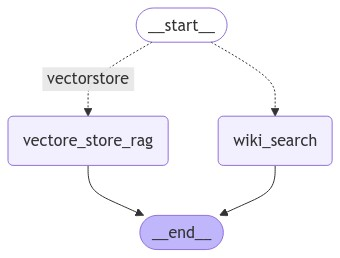

In [66]:
from IPython.display import Image, display

try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [75]:
from pprint import pprint

# Run
inputs = {
    "question": "Who is the hero in transformers?"
}
for output in app.stream(inputs):
    for key, value in output.items():
        # Node
        pprint(f"Node '{key}':")
        # Optional: print full state at each node
        # pprint.pprint(value["keys"], indent=2, width=80, depth=None)
    pprint("\n---\n")

# Final generation
pprint(value['documents'][0].dict()['metadata']['description'])

---ROUTE QUESTION---


---ROUTE QUESTION TO RAG---
"Node 'vectore_store_rag':"
'\n---\n'
('The new movie Transformers: One proves that the Autobots and Decepticons '
 'need to transform and roll out... back to where this franchise has succeeded '
 'best.')


In [82]:
from pprint import pprint

# Run
inputs = {
    "question": "what is skin diseases?"
}
for output in app.stream(inputs):
    for key, value in output.items():
        # Node
        pprint(f"Node '{key}':")
        # Optional: print full state at each node
        # pprint.pprint(value["keys"], indent=2, width=80, depth=None)
    pprint("\n---\n")

# Final generation
pprint(value['documents'][0].dict()['metadata']['description'])

---ROUTE QUESTION---


---ROUTE QUESTION TO RAG---
"Node 'vectore_store_rag':"
'\n---\n'
('\n'
 '      A common form of eczema called atopic dermatitis can interfere with '
 'daily activities. There are a number of prescription creams available to '
 'ease this chronic skin condition, but some are more effective than others, '
 'and a recent study compared them.\n'
 '    ')


In [79]:
value['documents'][1]

Document(metadata={'description': '\n      A common form of eczema called atopic dermatitis can interfere with daily activities. There are a number of prescription creams available to ease this chronic skin condition, but some are more effective than others, and a recent study compared them.\n    ', 'language': 'en', 'source': 'https://www.health.harvard.edu/blog/which-skin-creams-are-most-effective-for-eczema-202310122981', 'title': 'Which skin creams are most effective for eczema? - Harvard Health'}, page_content="Quelling the discomfort of atopic dermatitis, the most common form of eczema, can be a daily quest. This inflamed, itchy skin condition can interfere with sleeping, socializing, and many other activities.\nIf home remedies such as gentle cleansing and regular moisturizing don't provide relief, your doctor might recommend a prescription treatment to apply to your skin. Which prescription cream is most effective? A new study boils it down to a few overall winners.\nWhat is at

In [77]:
value['documents'][1]

Document(metadata={'description': 'The new movie Transformers: One proves that the Autobots and Decepticons need to transform and roll out... back to where this franchise has succeeded best.', 'language': 'en', 'source': 'https://www.ign.com/articles/transformers-one-movie-proves-animation-is-the-way-forward-for-the-troubled-franchise', 'title': 'The New Movie Transformers: One Proves What the Franchise Has Failed at for Years - IGN'}, page_content="Autobots are so faithfully devoted to their leader, and an appreciation for what was lost when Prime and Megatron’s friendship devolved into a bitter rivalry. What's The Best Transformers Movie?Pick a winner New duel1ST2ND3RDSee your ResultsFinish playing for your personal results or see the community’s!Continue playingSee resultsCould the same emotionally affecting story have been told in live-action? Probably, but we don’t know if it would have connected quite as well as it does. One is a reminder that the Transformers franchise just seem